# Gravity Drained Tank

Linear models are extremely convenient for analysis and control design. If we can successfully approximate the dynamics the of a system with a linear model then control design and analysis will be much easier

In the example we study the problem of constructing a linear approximation to a nonlinear process model. 

## Torricelli's law

Torricelli's law states the velocity of an incompressible liquid stream exiting a liquid tank at level $h$ below the surface is 

$$v = \sqrt{2gh}$$ 

This is the same velocity as an object dropped from a height $h$.

The derivation is straightforward. From Bernoulli's principle,

$$\frac{v^2}{2} + gh + \frac{P}{\rho} = \text{constant}$$

Applying this principle, we compare a drop of water just below the surface of the water at distance $h$ above the exit, to a drop of water exiting the tank

$$gh + \frac{P_{atm}}{\rho} = \frac{v^2}{2} + \frac{P_{atm}}{\rho}$$

$$\implies v^2 = 2gh$$
$$\implies v = \sqrt{2gh}$$

Torricelli's law is a rough approximation that doesn't account for the effects of fluid viscosity, the specific flow geometry near the exit, or other flow non-idealities. Nevertheless it is provides a useful first approximation for flow from a tank.

## Mass balance on a Tank with Constant Area

This example demonstrates the key steps in simulating the behavior of a gravity drained tank.  The liquid height in the tank is described by a differential equation  

$$A\frac{dh}{dt} = q_{in} - q_{out}$$

where $q_{out}$ is a function of liquid height. We assume flow from the tank is proportional to square root of the liquid height

$$ q_{out} = C_v\sqrt{h} $$

In our standard state space form for a nonlinear ordinary differential equation

$$ \frac{dh}{dt} = - \frac{C_V}{A}\sqrt{h} + \frac{1}{A}q_{in} $$

## Step 1. Define parameters

Provide values for all relevant parameters.  Use comments to describe the parameters and units.

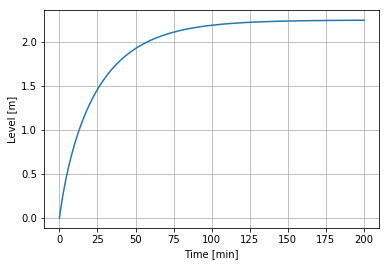

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Cv  = 0.1     # Outlet valve constant [cubic meters/min/meter^1/2]
A   = 1.0     # Tank area [meter^2]

# inlet flow rate in cubic meters/min
def qin(t):
    return 150/1000  # cubic meters/min

def f(h,t):
    return qin(t)/A - Cv*np.sqrt(h)/A

IC = [0.0]
t = np.linspace(0,200,101)
h = odeint(f,IC,t)
plt.plot(t,h)

plt.xlabel('Time [min]')
plt.ylabel('Level [m]')
plt.grid();

Let's try a linear approximation

$$\tau\frac{dx}{dt} + x = Ku$$

which has a step response solution that can be written

$$x(t) = x_{ss} + (x_0 - x_{ss})\exp(-t/\tau)$$

where $x_{ss} = Ku_{ss}$. The parameters in the model can be fit from the algebraic formulas

$$ K = \frac{x_{ss} - x_0}{u_{ss} - u_0}$$

$$\frac{x_{ss} - x(t)}{x_{ss} - x_0} = \exp(-t/\tau)$$


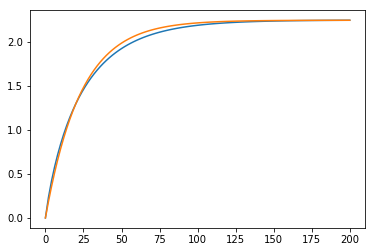

In [29]:
K = h[-1]/0.15
tau = -t[10]/np.log((h[-1]-h[10])/h[-1])

xss = K*0.15
xpred = xss - xss*np.exp(-t/tau)

plt.plot(t,h)
plt.plot(t,xpred)

## Step 2. Nonlinear Simulation

In [14]:
def qin(t):
    if t < 200.0:
        return 0.15         # m**3/min
    else:
        return 0.15 + 0.01  # m**3/min
    
def func(y,t):
    h = y
    return qin(t)/A - Cv*np.sqrt(h)/A



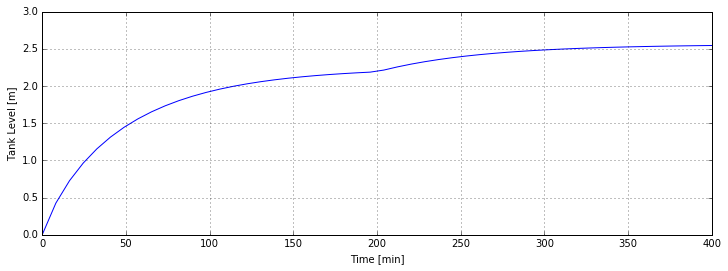

In [15]:
IC = [0.0]
t = linspace(0,400.0)

y = odeint(func,IC,t)

# visualization
figure(figsize=(12,4))
plot(t,y)
xlabel('Time [min]')
ylabel('Tank Level [m]')

grid()

# Step 3. Steady State

Given a nonlinear model

$$\frac{dh}{dt} = f(h,q)$$

where $h$ is the state and $q$ is the inlet. Let $\bar{q}$ be a nominal (i.e, typical) value. The steady-state value of $h$ is $\bar{h}$ is that value which sets $\frac{dh}{dt}$ to zero, in other words the solution to the equation

$$f(\bar{h},\bar{q}) = 0$$

In this case,

$$\frac{1}{A}\bar{q}_{in} - \frac{C_V}{A}\sqrt{\bar{h}} = 0$$

which gives

$$\bar{h} = \left(\frac{\bar{q}_{in}}{C_V}\right)^2$$

In [30]:
from pylab import *
from scipy.integrate import odeint
%matplotlib inline

Cv  = 0.1     # Outlet valve constant [cubic meters/min/meter^1/2]
A   = 2.0     # Tank area [meter^2]

qSS = 0.15            # nominal steady state value
hSS = (qSS/Cv)**2     # corresponding steady state liquid level

print "Steady State liquid level =", hSS, "meters"

Steady State liquid level = 2.25 meters


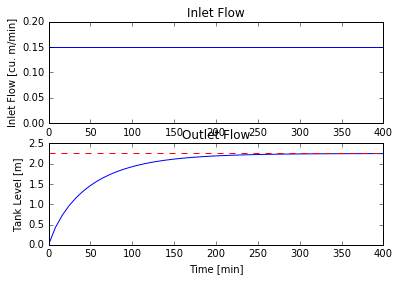

In [34]:
def qin(t):
    return qSS

def func(y,t):
    h = y
    return qin(t)/A - Cv*sqrt(h)/A

t = linspace(0,400.0)
h = odeint(func,[0.0],t)


subplot(2,1,1)
plot(t,map(qin,t))
title('Inlet Flow')
xlabel('Time [min]')
ylim(0,0.2)
ylabel('Inlet Flow [cu. m/min]')

subplot(2,1,2)
plot(t,h)
title('Outlet Flow')
plot(t,hSS*ones(size(t)),'r--')
xlabel('Time [min]')
ylabel('Tank Level [m]')



## Step 4. Define Deviation Variables

Deviation variables provide the 

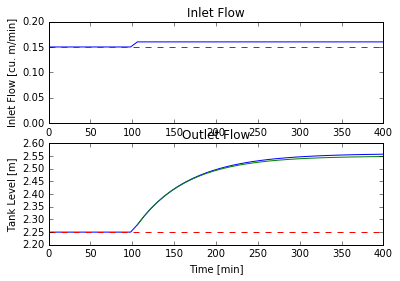

In [36]:
def qin(t):
    if t > 100.0:
        return qSS + 0.01  # m**3/min
    else:
        return qSS

def func(y,t):
    h = y
    return qin(t)/A - Cv*sqrt(h)/A

IC = [hSS]

t = linspace(0,400.0)
h = odeint(func,IC,t)

subplot(2,1,1)
plot(t,map(qin,t))
title('Inlet Flow')
plot(t,qSS*ones(size(t)),'r--')
xlabel('Time [min]')
ylim(0,0.2)
ylabel('Inlet Flow [cu. m/min]')

subplot(2,1,2)
plot(t,h)
title('Outlet Flow')
plot(t,hSS*ones(size(t)),'r--')
xlabel('Time [min]')
ylabel('Tank Level [m]')



a = -Cv*Cv/(2.0*A*qSS)
b = 1/A

tlin = t[t > 100]

plot(tlin, hSS -(b/a)*(1-exp(a*(tlin-100.0)))*0.01)


In [8]:
from control.matlab import *
from pylab import *


In [9]:
v = ss([1],[1],[1],[0])

In [10]:
plot(step(v))

TypeError: step() takes at least 2 arguments (1 given)